# ANÁLISIS PARTE IV

## La Balanza Comercial (Export vs Import)
### ¿España es un país que envía o que recibe?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargar datos internacionales
df_inter = pd.read_csv('../data/processed/CO597_transporte_mercancias_internacional.csv')
df_lpi = pd.read_csv('../data/processed/indice_desempeno_logistico_clean.csv')

In [3]:
# Agrupar por Año y Sentido (Expedido=Export / Recibido=Import)
balanza = df_inter.groupby(['año', 'desplazamiento'])['toneladas(miles)'].sum().unstack()

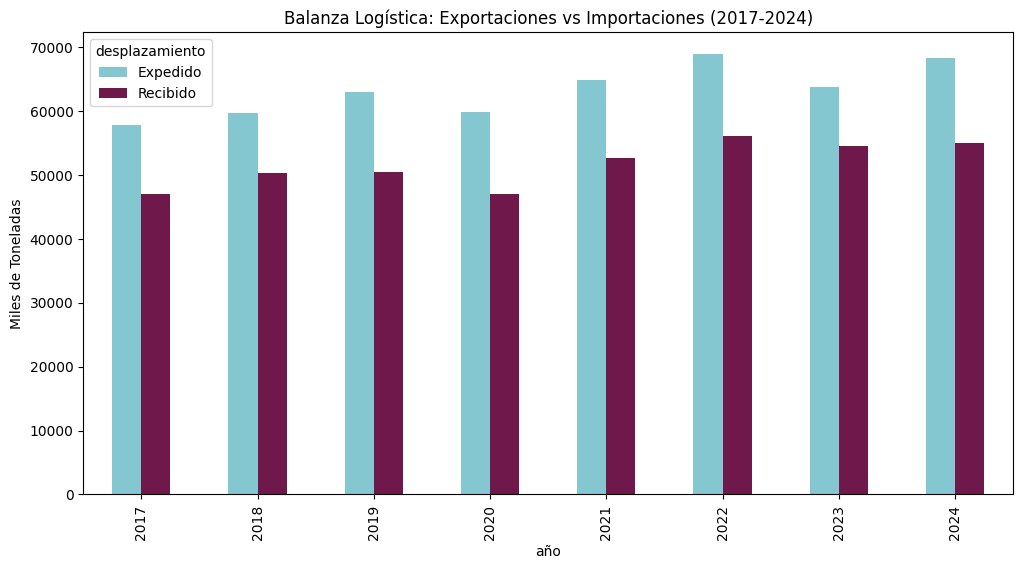

In [4]:
# Visualizar
balanza.plot(kind='bar', figsize=(12, 6), color=['#84C7D0', '#6F184B'])
plt.title('Balanza Logística: Exportaciones vs Importaciones (2017-2024)')
plt.ylabel('Miles de Toneladas')
plt.show()

In [5]:
# Filtrar países clave
paises_clave = ['España', 'Alemania', 'Francia', 'Italia', 'Portugal']
df_bench = df_lpi[df_lpi['País'].isin(paises_clave)]

In [6]:
# Pivotar para tener métricas claras
# Queremos ver la puntuación media del "Índice global" por año
evolucion_lpi = df_bench[df_bench['Indicador'] == 'Índice global de desempeño logístico (LPI)']

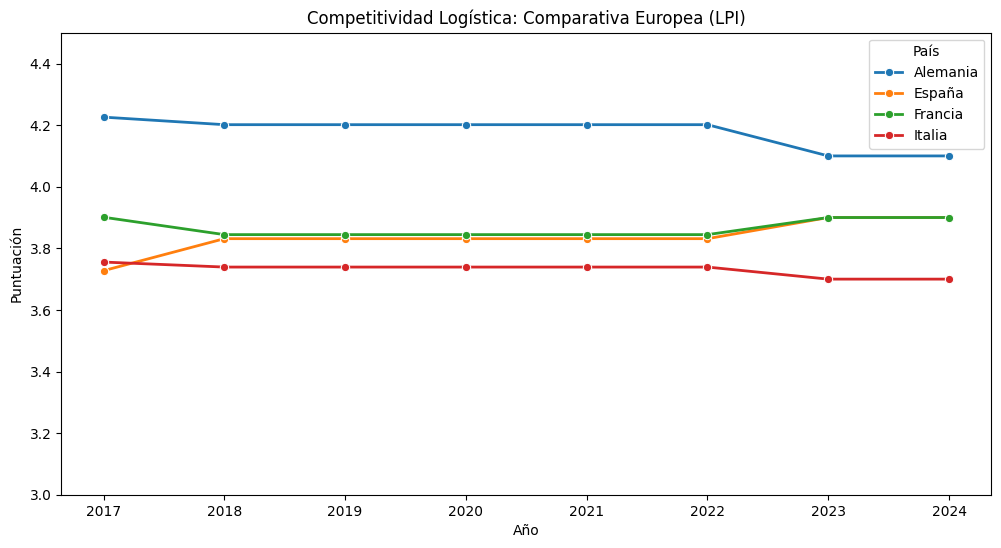

In [7]:
# Visualizar
plt.figure(figsize=(12, 6))
sns.lineplot(data=evolucion_lpi, x='Año', y='Puntuación', hue='País', marker='o', linewidth=2)
plt.title('Competitividad Logística: Comparativa Europea (LPI)')
plt.ylim(3, 4.5) # El índice va de 1 a 5, hacemos zoom
plt.show()

In [8]:
balanza.reset_index().to_csv('../data/processed/KPI_Balanza_Comercial.csv', index=False)
evolucion_lpi.to_csv('../data/processed/KPI_Benchmarking_LPI.csv', index=False)